In [183]:
import opendatasets as od
import pandas as pd
import numpy as np
 
od.download('https://www.kaggle.com/competitions/spaceship-titanic/data')

Skipping, found downloaded files in ".\spaceship-titanic" (use force=True to force download)


In [184]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [185]:
df = pd.read_csv('spaceship-titanic/train.csv')
df2 =  pd.read_csv('spaceship-titanic/test.csv')


In [186]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [187]:
df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
df2.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [188]:
# first iteration:
     
     # drpping out nulls



In [189]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [190]:
df.dropna(inplace=True)

In [191]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [192]:
df['HomePlanet'] = le.fit_transform(df['HomePlanet'])
df['CryoSleep'] = le.fit_transform(df['CryoSleep'])
df['Destination'] = le.fit_transform(df['Destination'])
df['VIP'] = le.fit_transform(df['VIP'])


df2['HomePlanet'] = le.fit_transform(df2['HomePlanet'])
df2['CryoSleep'] = le.fit_transform(df2['CryoSleep'])
df2['Destination'] = le.fit_transform(df2['Destination'])
df2['VIP'] = le.fit_transform(df2['VIP'])


In [225]:
x = df.drop(columns=['Transported'])
y = df['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [194]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
1869,0,0,2,17.0,0,0.0,0.0,249.0,537.0,5.0
6494,0,0,1,35.0,0,22.0,0.0,1179.0,0.0,33.0
2852,1,0,0,50.0,0,0.0,1547.0,0.0,1784.0,1.0
3131,0,0,1,53.0,0,2.0,18.0,705.0,0.0,1.0
32,0,0,2,32.0,0,0.0,850.0,81.0,437.0,453.0
...,...,...,...,...,...,...,...,...,...,...
4738,0,0,0,21.0,0,639.0,0.0,0.0,0.0,0.0
6539,0,0,1,25.0,0,0.0,1428.0,0.0,1483.0,0.0
6578,2,0,2,39.0,0,9.0,0.0,687.0,0.0,0.0
6793,1,0,2,26.0,0,0.0,6050.0,0.0,662.0,920.0


In [195]:
model = SVC()

In [196]:
model.fit(x_train, y_train)

SVC()

In [197]:
model.score(x_test, y_test)

0.7949458483754512

In [198]:
model = XGBClassifier(tree_method='gpu_hist', gpu_id=0)

In [199]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [200]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [201]:
prediction1 = model.predict(x_test)

In [202]:
rmse = np.sqrt(accuracy_score(y_test, prediction1))
print(f"accuracy_score_XGBoost = {rmse}")

accuracy_score_XGBoost = 0.8855029776718449


In [203]:
a = model.predict(x_test)

In [226]:
len(y_test)

1385

In [227]:
len(x_test)

1385

Confusion matrix


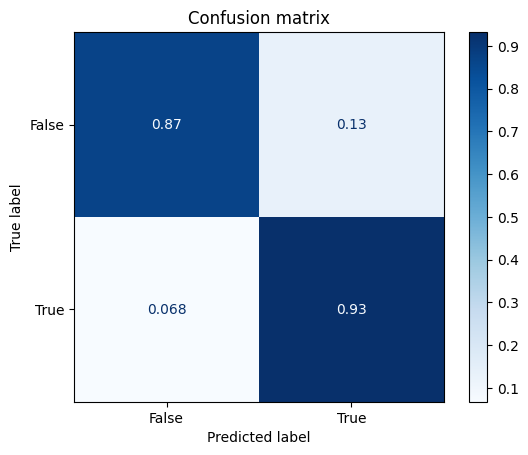

In [236]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    # display_labels=['0', '1'],
    cmap=plt.cm.Blues,
    normalize='true',
)
disp.ax_.set_title('Confusion matrix')

print('Confusion matrix')
# print(disp.confusion_matrix)

plt.show()

### Submission

In [204]:
model.fit(x,y)
prediction1 = model.predict(df2)

In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int32  
 2   Destination   4277 non-null   int32  
 3   Age           4186 non-null   float64
 4   VIP           4277 non-null   int32  
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), int32(4)
memory usage: 267.4 KB


In [206]:
submission = pd.read_csv('spaceship-titanic/sample_submission.csv')
submission['Transported'] = prediction1


In [207]:
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [209]:
submission['Transported'] = submission.Transported.apply(lambda x: submission.Transported[x]==0)

In [210]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [211]:
submission.to_csv('spaceship-titanic/submission.csv',index=False)

In [218]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    print(title,normalize)

Confusion matrix, without normalization None
Normalized confusion matrix true


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


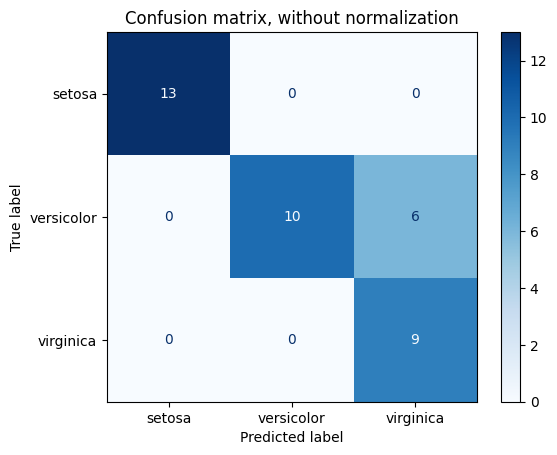

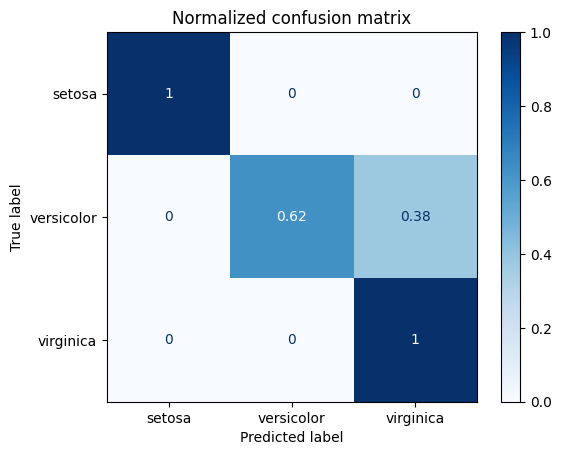

In [212]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()